# Understand The Data

In [151]:
import pandas as pd

In [152]:
df=pd.read_csv("/content/nissan-dataset.csv")
df

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Mike Wilson,63.0,Polygender,Juke,Yellow,339.0,715741.0,new,19710.18
9996,9997,Katie Wilson,45.0,Female,Maxima,Gray,81.0,786768.0,bad,47797.76
9997,9998,Jane Davis,27.0,Female,Leaf,Yellow,130.0,99170.0,very bad,35058.91
9998,9999,Katie Smith,68.0,Male,March / Micra,Green,215.0,640764.0,old,21176.71


In [153]:
df.shape

(10000, 10)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [155]:
df.describe()

,id,age,performance,km,price
count,10000.00000,9154.000000,9143.000000,9141.000000,9159.000000
mean,5000.50000,43.041730,197.783332,503033.441418,27365.125341
std,2886.89568,14.776421,112.779620,284967.128714,13598.200111
min,1.00000,18.000000,0.000000,808.000000,5000.250000
25%,2500.75000,31.000000,101.500000,258002.000000,15956.490000
50%,5000.50000,43.000000,196.000000,500903.000000,27296.050000
75%,7500.25000,56.000000,296.000000,748421.000000,38370.190000
max,10000.00000,69.000000,399.000000,999915.000000,223980.330000


In [156]:
df.describe(include = 'object')

,full_name,gender,model,color,condition
count,9157,9144,9130,9139,9151
unique,1100,8,70,23,6
top,John Smith,Male,Juke,Green,bad
freq,106,2157,882,896,2022


# Data Cleaning

In [157]:
# Find all duplicated rows
duplicates = df[df.duplicated()]

# Count the number of duplicated rows
duplicate_count = duplicates.shape[0]

print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [158]:
df.duplicated(subset=['full_name', 'model', 'performance','km','condition']).sum()

897

In [159]:
df.drop_duplicates(subset=['full_name', 'model', 'performance','km','condition'],inplace=True)

In [160]:
df.isnull().sum()

,0
id,0
full_name,3
age,5
gender,12
model,30
color,17
performance,17
km,19
condition,9
price,1


In [161]:
df['full_name'].fillna(df['full_name'].mode()[0],inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['model'].fillna('Unknown',inplace=True)
df['color'].fillna(df['color'].mode()[0],inplace=True)
df['performance'].fillna(df['performance'].mean(),inplace=True)
df['km'].fillna(df['km'].median(),inplace=True)
df['condition'].fillna(df['condition'].mode()[0],inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)

<ipython-input-161-66eca46a0d34>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['full_name'].fillna(df['full_name'].mode()[0],inplace=True)
<ipython-input-161-66eca46a0d34>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# Data Visualization

In [162]:
# How many unique values are present in each column.
for x in df.columns:
  print("nunique",x)
  print(df[x].nunique())
  print(" ")

nunique id
9103
 
nunique full_name
1100
 
nunique age
52
 
nunique gender
8
 
nunique model
71
 
nunique color
23
 
nunique performance
401
 
nunique km
9032
 
nunique condition
6
 
nunique price
9090
 


<ipython-input-163-c01dc4a7bf6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender",data=df,palette="viridis")


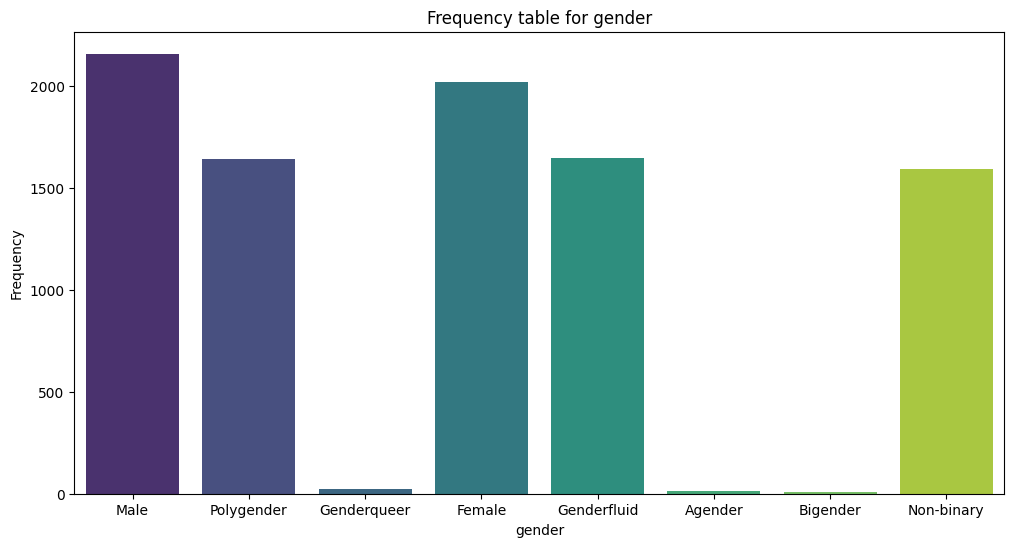

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x="gender",data=df,palette="viridis")
plt.title("Frequency table for gender")
plt.xlabel("gender")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

<ipython-input-164-ab036d72dbda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="condition",data=df,palette="viridis")


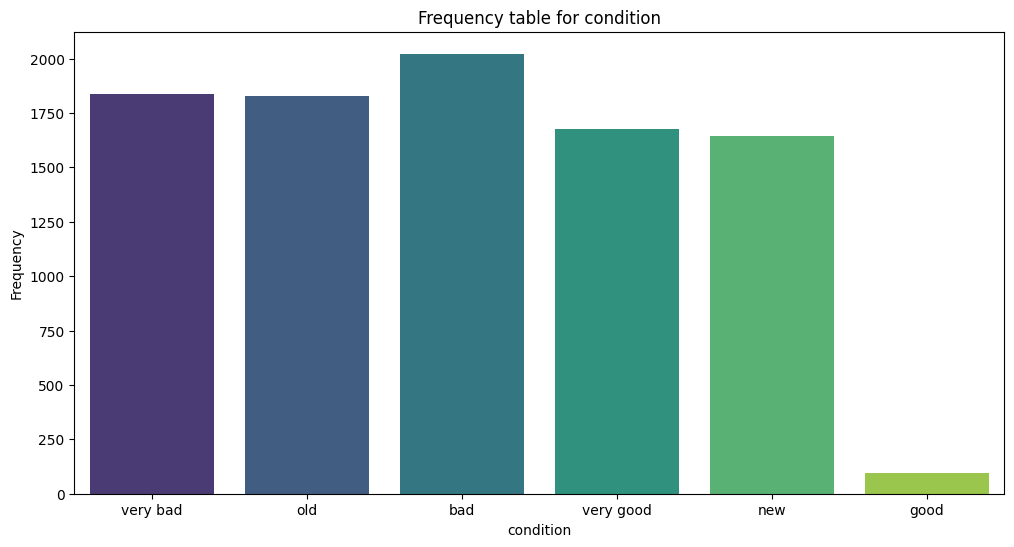

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x="condition",data=df,palette="viridis")
plt.title("Frequency table for condition")
plt.xlabel("condition")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

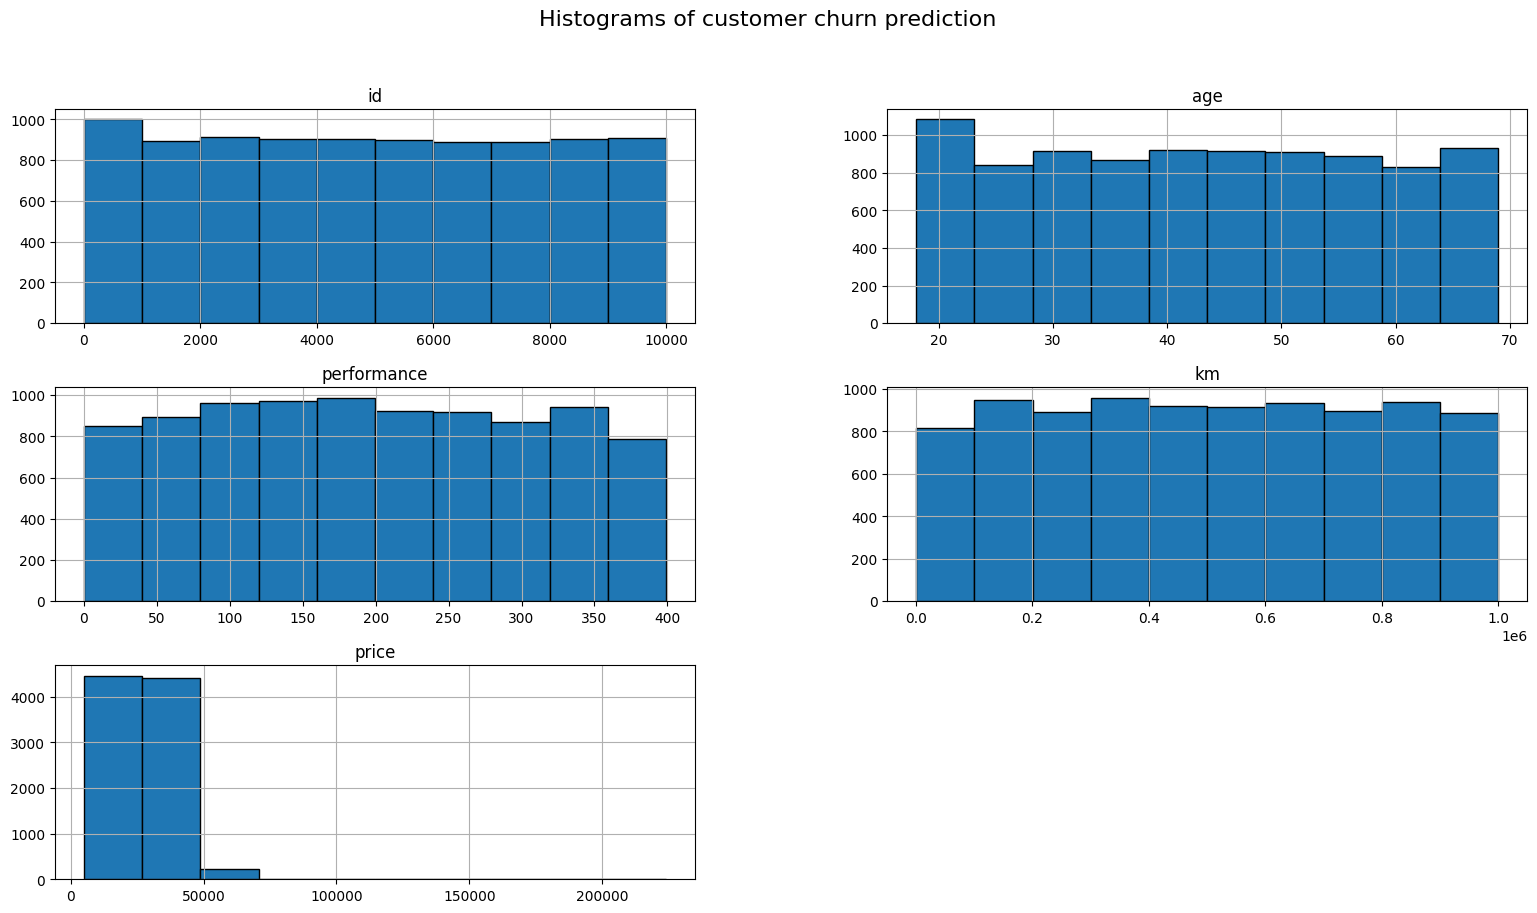

In [165]:
# Histogram
df.hist(edgecolor='black',figsize=(19,10))
plt.suptitle('Histograms of customer churn prediction',fontsize=16)
plt.show()

# Correlation Analysis

In [166]:
df.dtypes

,0
id,int64
full_name,object
age,float64
gender,object
model,object
color,object
performance,float64
km,float64
condition,object
price,float64


In [167]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['full_name'] = labelencoder.fit_transform(df['full_name'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['model'] = labelencoder.fit_transform(df['model'])
df['color'] = labelencoder.fit_transform(df['color'])
df['condition'] = labelencoder.fit_transform(df['condition'])

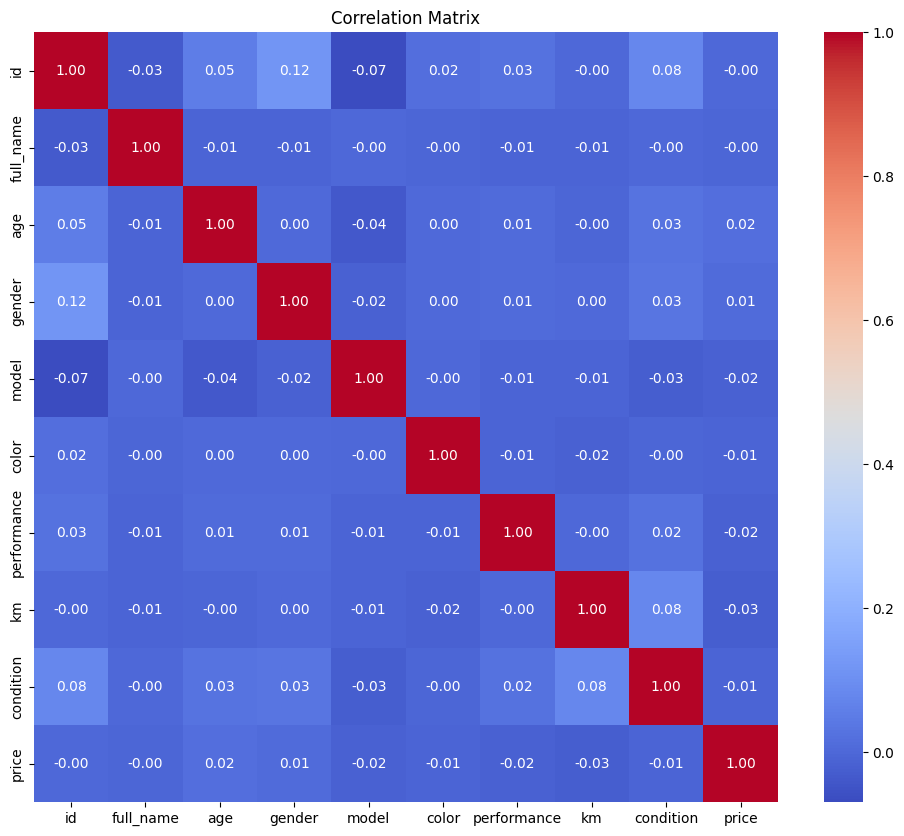

In [168]:
# Correlation matrix heatmap
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [169]:
# no correlation with target
df.drop(columns=['id','full_name'],inplace=True)

# Outliers

Outlier Detection is the process of identifying data points that significantly differ from the majority of a dataset.

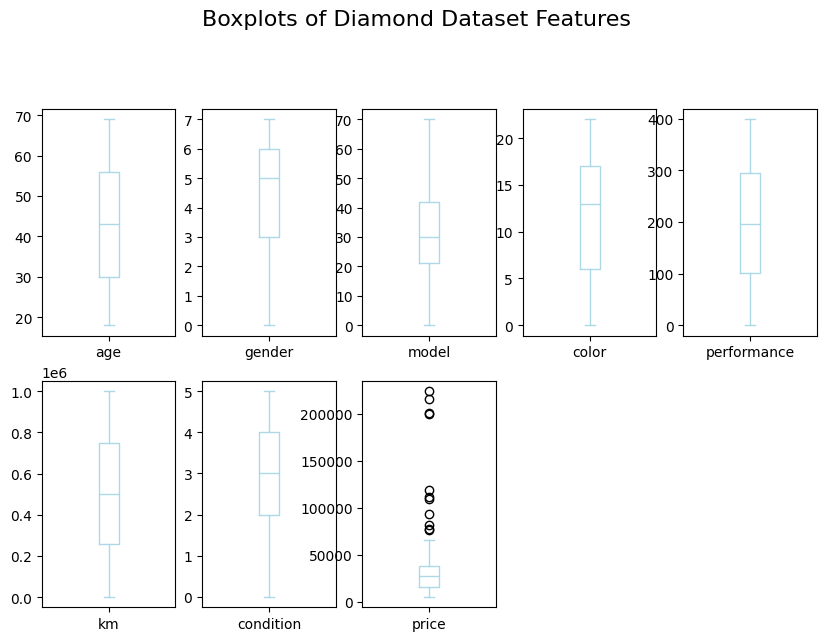

In [170]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Diamond Dataset Features', fontsize=16)
plt.show()

In [171]:
df.skew()

,0
age,0.016324
gender,-0.119749
model,-0.082982
color,-0.153099
performance,0.027252
km,0.006003
condition,-0.336621
price,1.167031


In [172]:
import numpy as np

# Log transformation is used to reduce skewness
df['age'] = np.log1p(df['age'])
df['color'] = np.log1p(df['color'])
df['performance'] = np.log1p(df['performance'])
df['km'] = np.log1p(df['km'])
df['age'] = np.log1p(df['age'])

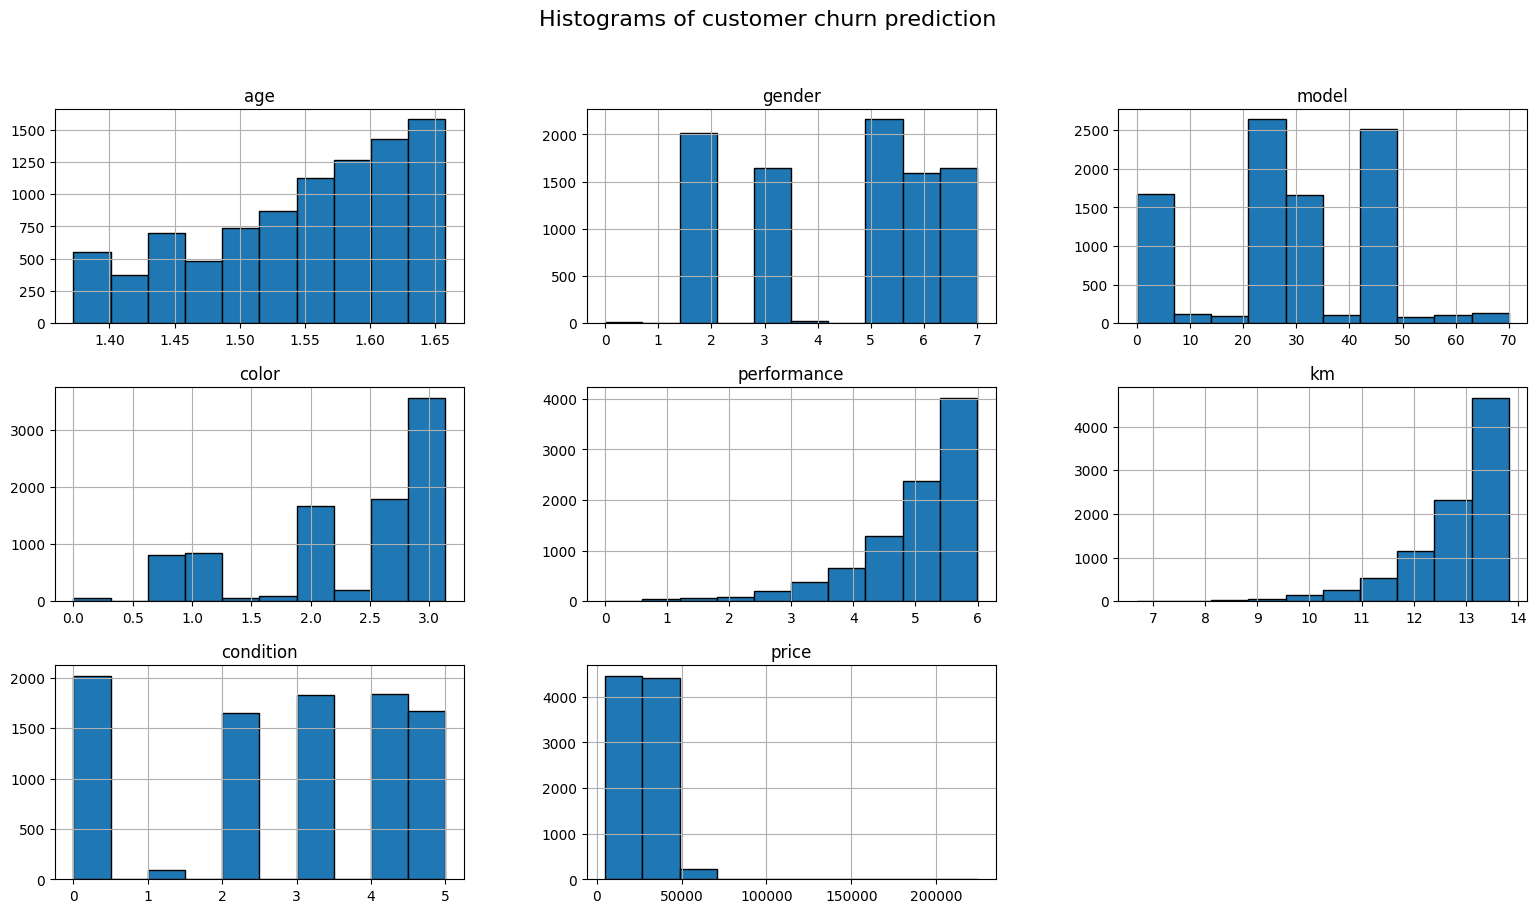

In [173]:
# Histogram
df.hist(edgecolor='black',figsize=(19,10))
plt.suptitle('Histograms of customer churn prediction',fontsize=16)
plt.show()

# Dimensionality Reduction
# principle component analysis(PCA)

Dimensionality Reduction is the process of reducing the number of features or variables in a dataset while retaining as much information as possible.

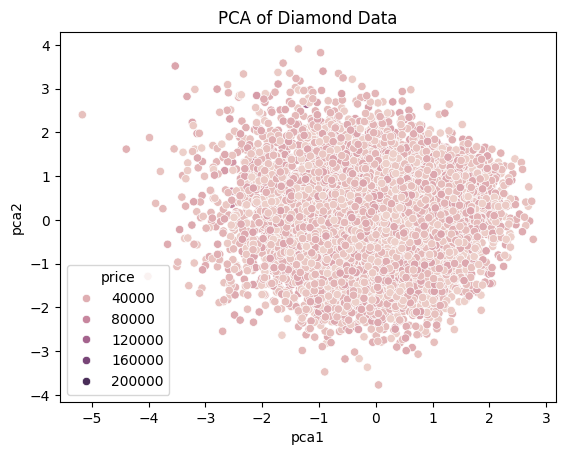

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = [ 'age','gender', 'model', 'color', 'performance','km', 'condition']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='price', data=df)
plt.title('PCA of Diamond Data')
plt.show()


# Data Scaling

Data Scaling is the process of transforming the features in a dataset to a similar scale or range. This is essential in many machine learning algorithms.

In [175]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['age','gender','model', 'color', 'performance','km', 'condition']] = scaler.fit_transform(df[['age','gender', 'model', 'color', 'performance','km', 'condition']])

#Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[[ 'age','gender', 'model', 'color', 'performance','km', 'condition']] = minmax_scaler.fit_transform(df[[ 'age','gender', 'model', 'color', 'performance','km', 'condition']])

In [176]:
df

,age,gender,model,color,performance,km,condition,price,pca1,pca2
0,0.658859,0.714286,0.671429,0.792509,0.951985,0.905245,0.8,40394.91,0.252025,-0.562279
1,0.835321,1.000000,0.685714,0.818037,0.784529,0.995132,0.6,8687.90,0.574541,-0.366625
2,0.566763,0.714286,0.428571,0.939067,0.662658,0.864443,0.0,44705.31,-1.236128,0.268838
3,0.847897,0.714286,0.300000,0.663194,0.971396,0.921838,1.0,32889.88,1.665826,0.330060
4,0.127761,0.714286,0.071429,0.734361,0.183363,0.970323,0.6,6949.22,0.368519,-0.959198
...,...,...,...,...,...,...,...,...,...,...
9994,0.000000,0.857143,0.685714,0.620607,0.751037,0.682424,0.8,27449.09,-1.075164,-1.462800
9995,0.939709,1.000000,0.342857,1.000000,0.972875,0.953038,0.4,19710.18,0.753095,1.048741
9996,0.708102,0.285714,0.442857,0.620607,0.735500,0.966327,0.0,47797.76,-0.876068,-0.368191
9997,0.328286,0.285714,0.385714,1.000000,0.813690,0.675429,0.8,35058.91,-1.126507,0.255795


# Initial Modeling and Hypothesis testing

Initial Modeling and Hypothesis Testing are foundational steps in the data analysis and machine learning process, aimed at understanding the data and establishing relationships among variables.

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

df.drop(columns=['price'])

X = df[['age','model', 'color', 'performance','km', 'condition']]


# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 0.05
R-squared: -0.00
Mean Squared Error: 0.00
